### Steganography
Steganography is the practice of hiding a file, message, image or video within another file, message, image or video. The word steganography is derived from the Greek words steganos (meaning hidden or covered) and graphe (meaning writing).

It is often used among hackers to hide secret messages or data within media files such as images, videos or audio files. Even though there are many legitimate uses for Steganography such as watermarking, malware programmers have also been found to use it to obscure the transmission of malicious code.

In this tutorial, we gonna write a Python code to hide text messages using a technique called Least Significant Bit.

Least Significant Bit (LSB) is a technique in which last bit of each pixel is modified and replaced with the data bit. This method only works on Lossless-compression images, which means that the files are stored in a compressed format, but that this compression does not result in the data being lost or modified, PNG, TIFF, and BMP as an example, are lossless-compression image file formats.

As you may already know, an image consists of several pixels, each pixel contains three values (which are Red, Green, Blue), these values range from ```0``` to ```255```, in other words, they are 8-bit values. For example, a value of ```225``` is ```11100001``` in binary and so on.

Let's take an example of how this technique works, say I want to hide the message "hi" into a 4x4 image, here are the example image pixel values:

```
[(225, 12, 99), (155, 2, 50), (99, 51, 15), (15, 55, 22),
(155, 61, 87), (63, 30, 17), (1, 55, 19), (99, 81, 66),
(219, 77, 91), (69, 39, 50), (18, 200, 33), (25, 54, 190)]
```

By looking at the ASCII Table, we can convert this message into decimal values and then into binary:
```
0110100 0110101
```

Now, we iterate over the pixel values one by one, after converting them to binary, we replace each least significant bit with that message bits sequentially (e.g ```225``` is ```11100001```, we replace the last bit, the bit in the right (1) with the first data bit (0) and so on).

This will only modify the pixel values by +1 or -1 which is not visually noticable at all, you can also use 2-Least Significant Bits too which will modify the pixels by a range of -3 to +3.

Here is the resulting pixel values (you can check them on your own):

```
[(224, 13, 99),(154, 3, 50),(98, 50, 15),(15, 54, 23),
(154, 61, 87),(63, 30, 17),(1, 55, 19),(99, 81, 66),
(219, 77, 91),(69, 39, 50),(18, 200, 33),(25, 54, 190)]
```

In [1]:
from IPython.display import Image

from steganography import *

input_image = "image.jpg"
output_image = "steganography.PNG"
secret_data = "https://cdimage.kali.org/kali-2020.3/kali-linux-2020.3-installer-amd64.iso"

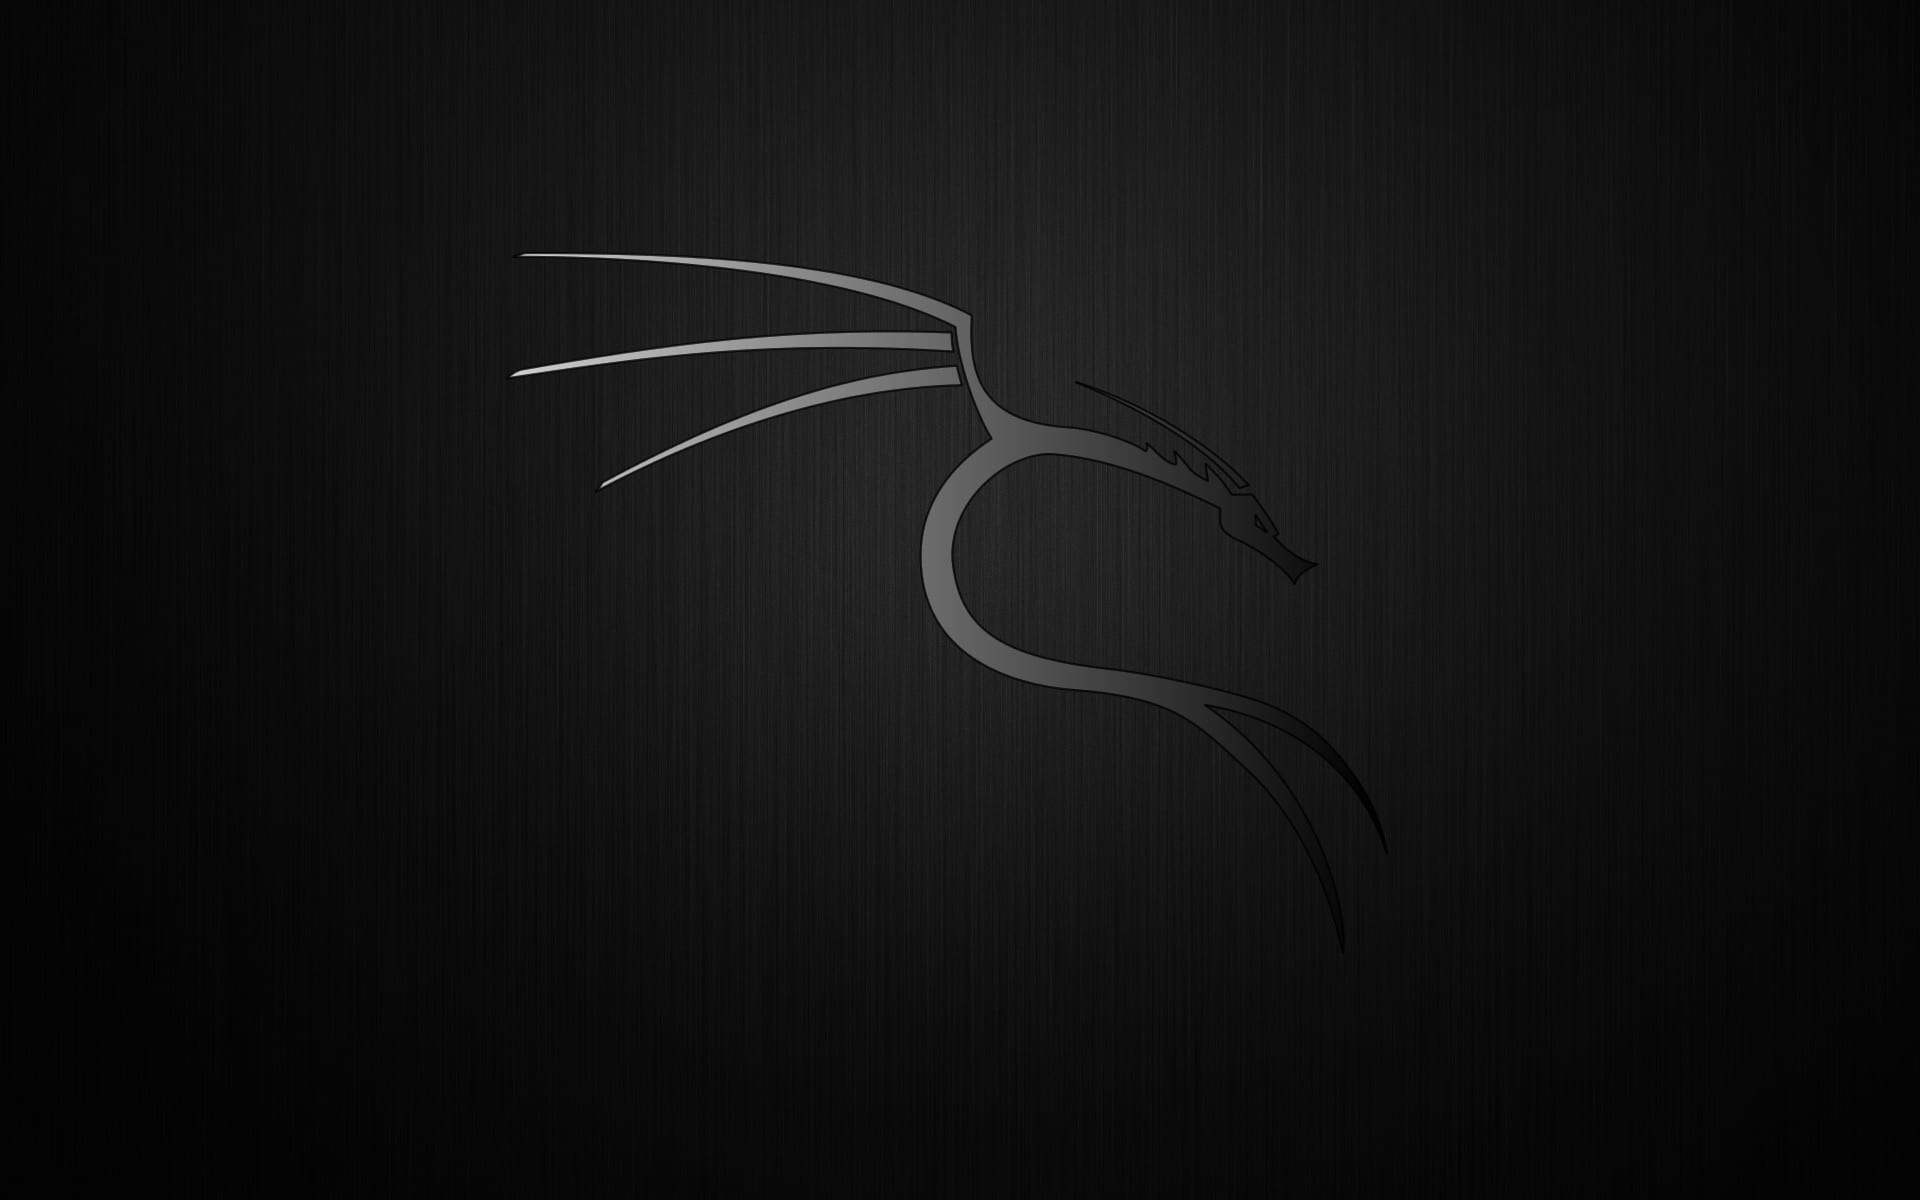

In [2]:
Image(input_image, height=200, width=500)

Here is what the ```encode()``` function does:

1. Reads the image using cv2.imread() function.
2. Counts the maximum bytes available to encode the data.
3. Checks whether we can encode all the data into the image.
4. Adding a stopping criteria, this will be as indicator for the decoder to stop decoding whenever it sees this (feel free to implement a better and more efficient one).
5. Finally, modifying the last bit of each pixel and replacing it by the data bit.


In [3]:
# encode the data into the image
encoded_image = encode(image_name=input_image, secret_data=secret_data)

# save the output image (encoded image)
cv2.imwrite(output_image, encoded_image)
print("\n")

[*] Encrypting & Encoding data...
[*] Maximum bytes to encode: 864000




Regarding the ```decode()``` fn, we read the image and then get all the last bits of every pixel of the image. After that, we keep decoding until we see that stopping criteria.

In [4]:
# decode the secret data from the image
decoded_data = decode(output_image)
print("[+] Decoded data:", decoded_data)

[+] Decoding...
[+] Decoded data: b'https://cdimage.kali.org/kali-2020.3/kali-linux-2020.3-installer-amd64.iso'


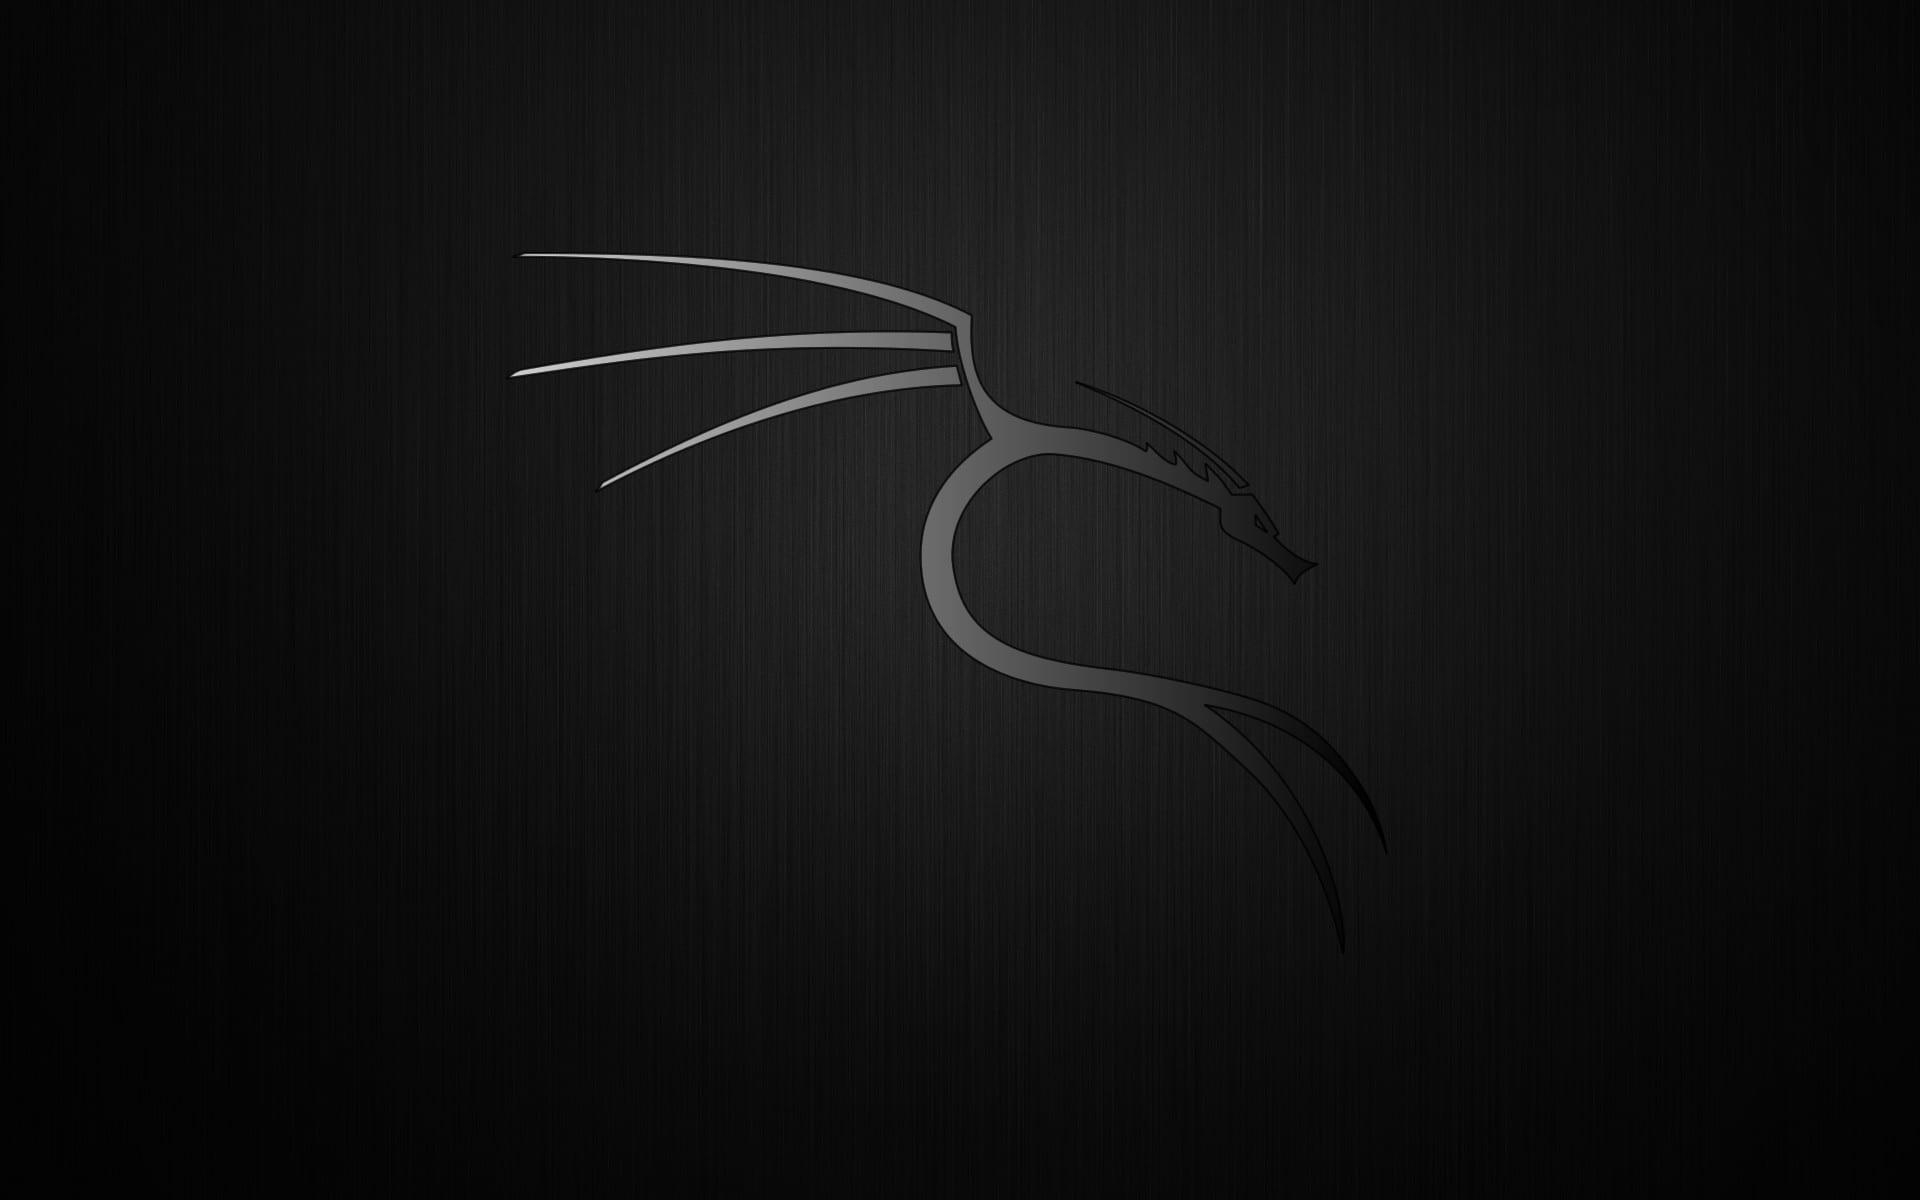

In [5]:
Image(output_image, retina=True, height=200, width=500)